In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
import pandas as pd

# Load the dataset
file_path = 'Titanic-Dataset.csv'
data = pd.read_csv(file_path)

# Step 1: Remove unnecessary columns
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])

# Step 2: Normalize the dataset to 3NF
# Table 1: Passenger Information
passenger_info = data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

# Table 2: Survival Information
survival_info = data[['PassengerId', 'Survived']]

# Table 3: Fare Information
fare_info = data[['PassengerId', 'Fare']]

# Save or display the tables
passenger_info.to_csv('passenger_info.csv', index=False)
survival_info.to_csv('survival_info.csv', index=False)
fare_info.to_csv('fare_info.csv', index=False)

# Display the first few rows of each table
print("Passenger Information Table:")
print(passenger_info.head())

print("\nSurvival Information Table:")
print(survival_info.head())

print("\nFare Information Table:")
print(fare_info.head())

Passenger Information Table:
   PassengerId  Pclass     Sex   Age  SibSp  Parch Embarked
0            1       3    male  22.0      1      0        S
1            2       1  female  38.0      1      0        C
2            3       3  female  26.0      0      0        S
3            4       1  female  35.0      1      0        S
4            5       3    male  35.0      0      0        S

Survival Information Table:
   PassengerId  Survived
0            1         0
1            2         1
2            3         1
3            4         1
4            5         0

Fare Information Table:
   PassengerId     Fare
0            1   7.2500
1            2  71.2833
2            3   7.9250
3            4  53.1000
4            5   8.0500


In [7]:
import sqlite3
import pandas as pd

file_path = 'Titanic-Dataset.csv'
data = pd.read_csv(file_path)

# Normalize the dataset
passenger_info = data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
survival_info = data[['PassengerId', 'Survived']]
fare_info = data[['PassengerId', 'Fare']]

# Connect to SQLite database
conn = sqlite3.connect('titanic.db')

# Check if tables exist
query_check = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query_check, conn)
print("Existing tables:", tables)

# Create tables if they don't exist
if 'passenger_info' not in tables.values:
    passenger_info.to_sql('passenger_info', conn, if_exists='replace', index=False)
if 'survival_info' not in tables.values:
    survival_info.to_sql('survival_info', conn, if_exists='replace', index=False)
if 'fare_info' not in tables.values:
    fare_info.to_sql('fare_info', conn, if_exists='replace', index=False)

# Define the SQL join query
query = """
SELECT
    passenger_info.PassengerId,
    passenger_info.Pclass,
    passenger_info.Sex,
    passenger_info.Age,
    passenger_info.SibSp,
    passenger_info.Parch,
    passenger_info.Embarked,
    survival_info.Survived,
    fare_info.Fare
FROM
    passenger_info
JOIN
    survival_info
ON
    passenger_info.PassengerId = survival_info.PassengerId
JOIN
    fare_info
ON
    passenger_info.PassengerId = fare_info.PassengerId;
"""

# Execute the query and load the data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
print(df.head())


Existing tables:              name
0  passenger_info
1   survival_info
2       fare_info
   PassengerId  Pclass     Sex   Age  SibSp  Parch Embarked  Survived     Fare
0            1       3    male  22.0      1      0        S         0   7.2500
1            2       1  female  38.0      1      0        C         1  71.2833
2            3       3  female  26.0      0      0        S         1   7.9250
3            4       1  female  35.0      1      0        S         1  53.1000
4            5       3    male  35.0      0      0        S         0   8.0500


In [8]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split


# Display the first few rows of the DataFrame
print("Data Overview:")
print(df.head())

# Check for stratification need
print("\nSurvived Value Counts:")
print(df['Survived'].value_counts())

# Perform train/test split
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

# Stratify by 'Survived' to maintain class distribution in train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the split results
print("\nTrain/Test Split:")
print("Training Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])

Data Overview:
   PassengerId  Pclass     Sex   Age  SibSp  Parch Embarked  Survived     Fare
0            1       3    male  22.0      1      0        S         0   7.2500
1            2       1  female  38.0      1      0        C         1  71.2833
2            3       3  female  26.0      0      0        S         1   7.9250
3            4       1  female  35.0      1      0        S         1  53.1000
4            5       3    male  35.0      0      0        S         0   8.0500

Survived Value Counts:
Survived
0    549
1    342
Name: count, dtype: int64

Train/Test Split:
Training Set Size: 712
Testing Set Size: 179


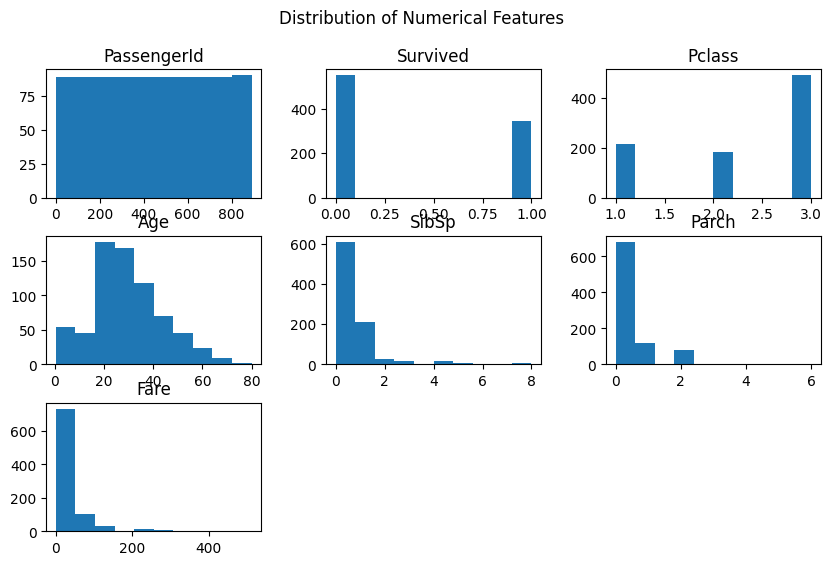

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [13]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported for plotting
from sklearn.model_selection import train_test_split
df = pd.DataFrame(data)

# 1. Data Profiling - Summary Statistics
summary_stats = df.describe()

# 2. Missing Values
missing_values = df.isnull().sum()

# 3. Distribution of Numerical Features (using histograms)
df.hist(bins=10, figsize=(10, 6), grid=False)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# 4. Correlation Matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 5. Outliers and Capping (using the 95th percentile for 'Fare')
fare_95th_percentile = df['Fare'].quantile(0.95)
capped_fare = df['Fare'].apply(lambda x: min(x, fare_95th_percentile))

# 6. Train/Test Split
train_df = df.sample(frac=0.8, random_state=42)  # 80% for training
test_df = df.drop(train_df.index)  # 20% for testing

# Display results
print(f"Summary Statistics:\n{summary_stats}")
print(f"Missing Values:\n{missing_values}")
print(f"95th Percentile for Fare: {fare_95th_percentile}")
print(f"Training Set Size: {train_df.shape[0]}")
print(f"Testing Set Size: {test_df.shape[0]}")

In [16]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [21]:
!mkdir -p data
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
  !mv "Titanic-Dataset.csv" data/

Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv


In [22]:
# Install the DagsHub python client
!pip install -q dagshub


In [24]:
# Upload using the DagsHub client, to a DVC tracked folder also called "data".
# Follow the instructions that appear to authorize the request.
from dagshub import upload_files
upload_files('cheepuripalli.sharmiladevi/titanic', '/content/Titanic-Dataset.csv')

Uploading files (1) to "cheepuripalli.sharmiladevi/titanic"...

Upload finished successfully!

In [25]:
import dagshub
dagshub.init(repo_owner='cheepuripalli.sharmiladevi', repo_name='titanic', mlflow=True)


Initialized MLflow to track repo "cheepuripalli.sharmiladevi/titanic"

Repository cheepuripalli.sharmiladevi/titanic initialized!

In [30]:
#EXPERIMENT-1
from sklearn.impute import SimpleImputer

# Update column transformations to include imputation
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with the mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the updated pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Rerun the training and cross-validation
with mlflow.start_run():
    # Log the model parameters
    mlflow.log_param("scaler", "MinMaxScaler")
    mlflow.log_param("classifier", "LogisticRegression")

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

    # Log cross-validation results
    mlflow.log_metric("cv_mean_f1", cv_scores.mean())
    mlflow.log_metric("cv_std_f1", cv_scores.std())

    # Train model on the entire training set
    pipeline.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Log test set results
    mlflow.log_metric("test_f1", f1)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)

    # Log the model
    mlflow.sklearn.log_model(pipeline, "logistic_regression_model")

# Print results
print("Cross-validation F1-score (mean/std):", cv_scores.mean(), "/", cv_scores.std())
print("Test F1-score:", f1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


2024/12/21 01:49:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run mercurial-dove-784 at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1/runs/2f9b1d85b04d418cabd1afd716e5832c
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1
Cross-validation F1-score (mean/std): 0.7293352136896858 / 0.04117893855243745
Test F1-score: 0.7131782945736435
Confusion Matrix:
[[96 14]
 [23 46]]


In [32]:
pip install --upgrade xgboost


KeyError: "['Cabin'] not found in axis"

In [49]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix
import mlflow
import mlflow.sklearn
# Prepare features and target
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

# Handle missing values separately for numerical and categorical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Fill missing values in numerical features with the mean
X[numerical_features] = X[numerical_features].apply(lambda col: col.fillna(col.mean()), axis=0)

# Fill missing values in categorical features with "Missing"
X[categorical_features] = X[categorical_features].fillna("Missing")

# Notify the user that missing values are handled
print("Missing values handled successfully. Proceeding with training.")


# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define classifiers to evaluate
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RidgeClassifier": RidgeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)
}

# Start MLflow experiment
mlflow.set_tracking_uri("https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow")
mlflow.set_experiment("Experiment_2_Titanic_Classifiers")

for name, model in classifiers.items():
    with mlflow.start_run(run_name=name):
        # Create the pipeline for each classifier
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        try:
            # Perform cross-validation
            cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

            # Check for NaN in cross-validation scores
            if pd.isnull(cv_scores).any():
                print(f"NaN detected in cross-validation scores for {name}. Please check data preprocessing.")
                continue

            # Log cross-validation results
            mlflow.log_param("model", name)
            mlflow.log_metric("cv_mean_f1", cv_scores.mean())
            mlflow.log_metric("cv_std_f1", cv_scores.std())

            # Train model on the entire training set
            pipeline.fit(X_train, y_train)

            # Evaluate on the test set
            y_pred = pipeline.predict(X_test)
            f1 = f1_score(y_test, y_pred)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

            # Log test set results
            mlflow.log_metric("test_f1", f1)
            mlflow.log_metric("true_positive", tp)
            mlflow.log_metric("true_negative", tn)
            mlflow.log_metric("false_positive", fp)
            mlflow.log_metric("false_negative", fn)

            # Log the model
            mlflow.sklearn.log_model(pipeline, f"{name}_model")

            # Print results
            print(f"Results for {name}:")
            print("Cross-validation F1-score (mean/std):", cv_scores.mean(), "/", cv_scores.std())
            print("Test F1-score:", f1)
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))

        except Exception as e:
            print(f"Error with model {name}: {e}")


Missing values handled successfully. Proceeding with training.


2024/12/21 02:21:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for LogisticRegression:
Cross-validation F1-score (mean/std): 0.7357361595755695 / 0.04209600649939632
Test F1-score: 0.7142857142857143
Confusion Matrix:
[[98 12]
 [24 45]]
🏃 View run LogisticRegression at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1/runs/4c058facc7ff4be68b3edfafb5a485fe
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1


2024/12/21 02:21:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RidgeClassifier:
Cross-validation F1-score (mean/std): 0.7237658727193618 / 0.043686057589737225
Test F1-score: 0.734375
Confusion Matrix:
[[98 12]
 [22 47]]
🏃 View run RidgeClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1/runs/2453ff1141ba4da7b384a10581a878d5
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1


2024/12/21 02:22:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Results for RandomForestClassifier:
Cross-validation F1-score (mean/std): 0.7279565819980813 / 0.04270321306201722
Test F1-score: 0.75
Confusion Matrix:
[[99 11]
 [21 48]]
🏃 View run RandomForestClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1/runs/4b32e071f22441249300a2144757254b
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags

NaN detected in cross-validation scores for XGBClassifier. Please check data preprocessing.
🏃 View run XGBClassifier at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1/runs/621c02222b7945148b73a29a93acba9f
🧪 View experiment at: https://dagshub.com/cheepuripalli.sharmiladevi/titanic.mlflow/#/experiments/1
